In [1]:
import sys
import os
import pandas as pd
import numpy as np
import gzip
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.model_selection import train_test_split
import re
import tensorflow as tf
import keras
from tensorflow import keras
from keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('/Users/CourtneyTaylor/Downloads/imdb_labelled.txt', delimiter='\t', header=None)

In [3]:
df.columns

Int64Index([0, 1], dtype='int64')

In [4]:
df.columns = ["review", "sentiment"]

In [5]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [6]:
df.shape

(748, 2)

In [7]:
df.describe()

,sentiment
count,748.000000
mean,0.516043
std,0.500077
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
df['sentiment'].value_counts()

1    386
0    362
Name: sentiment, dtype: int64

In [9]:
#split df into positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == 0]

In [10]:
df = df[['review','sentiment']]
print(df.shape)
df.head(5)

(748, 2)


,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


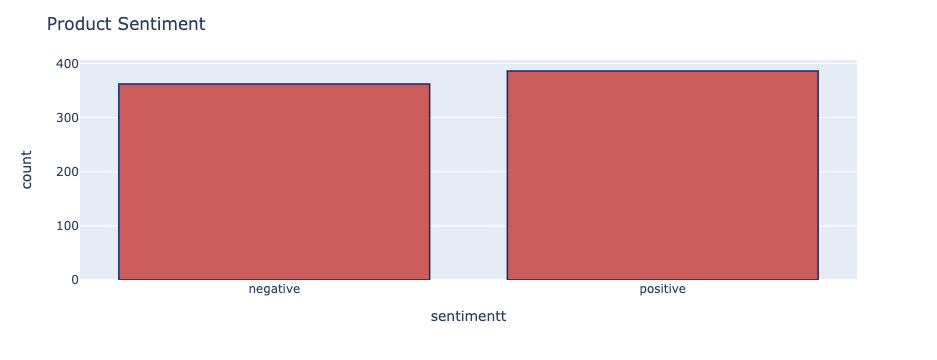

In [11]:
#Negative vs Positive Sentiment
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
df['sentimentt'] = df['sentiment'].replace({0 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show()

In [12]:
#Quick display columns
pd.set_option('display.max_colwidth', 5000)
df.head(10)

,review,sentiment,sentimentt
0,"A very, very, very slow-moving, aimless movie about a distressed, drifting young man.",0,negative
1,"Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.",0,negative
2,"Attempting artiness with black & white and clever camera angles, the movie disappointed - became even more ridiculous - as the acting was poor and the plot and lines almost non-existent.",0,negative
3,Very little music or anything to speak of.,0,negative
4,The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head.,1,positive
5,"The rest of the movie lacks art, charm, meaning... If it's about emptiness, it works I guess because it's empty.",0,negative
6,Wasted two hours.,0,negative
7,"Saw the movie today and thought it was a good effort, good messages for kids.",1,positive
8,A bit predictable.,0,negative
9,Loved the casting of Jimmy Buffet as the science teacher.,1,positive


In [13]:
#Removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply to 'review' column
df['review']=df['review'].apply(remove_special_characters)

In [14]:
#set stopwords to english
stop=set(stopwords.words('english'))
print(stop)

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.Tokenizer(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

{'couldn', 'be', "you're", 'it', 'whom', 'while', "you'll", 'off', 'she', 'yours', 'yourselves', 'doing', 'a', 're', 'now', 'why', 'you', 'further', 'can', "doesn't", 'we', 'those', 'y', 'don', 'me', 'again', 'or', 'is', 'm', "couldn't", 'was', 'after', 'did', 'not', 'will', 's', 'hers', 'nor', 'of', 'my', 'wasn', 'weren', 'wouldn', 'as', 'just', 'ourselves', 'his', 'these', 'but', "needn't", "it's", 'has', 'the', 'any', 'very', 'this', 'by', "haven't", 'there', 'its', 'had', 'other', "you'd", 'only', "weren't", 'mustn', 'until', 'won', "isn't", 'do', 'how', 'your', 'been', 'about', 'didn', "mightn't", 'to', 'no', 'from', 'out', 'own', 't', 'll', "won't", 'here', 'down', 'because', 'him', 'am', 'during', 'at', 'where', 'more', "shan't", "wouldn't", 'with', 'an', 'i', "mustn't", 'her', 'between', 'too', "should've", 'theirs', 'their', "that'll", 'shan', 'needn', 've', 'when', 'does', 'mightn', 'over', 'what', 'hadn', 'in', 'ours', 'through', 'same', 'for', 'have', 'both', 'ma', 'under',

In [15]:
#Finding vocab size
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['review'])
print("Vocabulary size: ", len(tokenizer.word_index) +1)

Vocabulary size:  3175


In [16]:
#Max Sequence
max_sequence_embedding = int(round(np.sqrt(np.sqrt(3175)), 0))
max_sequence_embedding

8

In [17]:
#Max Length
review_length = []
for review in df['review']:
    review_length.append(len(review.split(' ')))
    
max_length = int(round(np.mean(review_length), 0))
print("Max length: ", max_length)

Max length:  22


In [18]:
#print word index
print(tokenizer.word_index)

{'the': 1, 'a': 2, 'and': 3, 'of': 4, 'is': 5, 'this': 6, 'i': 7, 'it': 8, 'to': 9, 'in': 10, 'was': 11, 'movie': 12, 'that': 13, 'film': 14, '0': 15, '1': 16, 'for': 17, 'as': 18, 'but': 19, 'with': 20, 'its': 21, 'one': 22, 'on': 23, 'you': 24, 'are': 25, 'not': 26, 'bad': 27, 'very': 28, 'just': 29, 'so': 30, 'all': 31, 'good': 32, 'at': 33, 'an': 34, 'there': 35, 'about': 36, 'be': 37, 'by': 38, 'have': 39, 'like': 40, 'from': 41, 'if': 42, 'time': 43, 'acting': 44, 'his': 45, 'really': 46, 'or': 47, 'out': 48, 'great': 49, 'even': 50, 'who': 51, 'were': 52, 'he': 53, 'has': 54, 'characters': 55, 'see': 56, 'my': 57, 'most': 58, 'how': 59, 'more': 60, 'no': 61, 'well': 62, 'only': 63, 'movies': 64, 'ever': 65, 'story': 66, 'plot': 67, 'when': 68, 'made': 69, 'some': 70, 'films': 71, 'they': 72, 'dont': 73, 'best': 74, 'because': 75, 'your': 76, 'also': 77, 'can': 78, 'than': 79, 'script': 80, 'other': 81, 'seen': 82, 'way': 83, 'love': 84, 'character': 85, 'make': 86, 'would': 87, 

In [19]:
#Tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")

In [20]:
#Splitting the data set
split = round(len(df)*0.8)
X_train = df['review'][:split]
y_train = df['sentiment'][:split]
X_test = df['review'][split:]
y_test = df['sentiment'][split:]

In [21]:
#Convert reviews to string
#If there are any reviews that are not strings, we will get errors later on
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []
for row in X_train:
    training_sentences.append(str(row))
for row in y_train:
    training_labels.append(row)
for row in X_test:
    testing_sentences.append(str(row))
for row in y_test:
    testing_labels.append(row)

In [22]:
#Padding
vocab_size = 3175
embedding_dim = 8
max_length = 22
trunc_type = 'post'
oov_tok = '<OOV>'
padding_type = 'post'

In [23]:
#Tokenization
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

In [24]:
#Convert sentences into the sequences of words & then pads
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
testing_sentences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sentences, maxlen=max_length)

In [38]:
#Save data sets
pd.DataFrame(df).to_csv('D213TaskTwo_df.csv')
pd.DataFrame(training_sentences).to_csv('training_sentences.csv')
pd.DataFrame(training_labels).to_csv('train_labels.csv')
pd.DataFrame(testing_sentences).to_csv('test_sentences.csv')
pd.DataFrame(testing_labels).to_csv('testing_labels.csv')

In [25]:
#Model Development
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

2022-09-24 11:51:04.119630: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
#Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
#View model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 22, 8)             25400     
                                                                 
 global_average_pooling1d (G  (None, 8)                0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 54        
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 25,461
Trainable params: 25,461
Non-trainable params: 0
_________________________________________________________________


In [28]:
#Model
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [29]:
#Model
early_stopping_monitor = EarlyStopping(patience=3)
num_epochs = 50
history = model.fit(padded, training_labels_final, epochs=num_epochs, 
                    validation_data=(testing_padded, testing_labels_final), 
                    callbacks=[early_stopping_monitor])

Epoch 1/50
19/19 [==============================] - 2s 15ms/step - loss: 0.6928 - accuracy: 0.5084 - val_loss: 0.6957 - val_accuracy: 0.3267
Epoch 2/50
19/19 [==============================] - 0s 6ms/step - loss: 0.6913 - accuracy: 0.5234 - val_loss: 0.6953 - val_accuracy: 0.3333
Epoch 3/50
19/19 [==============================] - 0s 7ms/step - loss: 0.6893 - accuracy: 0.5468 - val_loss: 0.6957 - val_accuracy: 0.3467
Epoch 4/50
19/19 [==============================] - 0s 11ms/step - loss: 0.6863 - accuracy: 0.5903 - val_loss: 0.6945 - val_accuracy: 0.4200
Epoch 5/50
19/19 [==============================] - 0s 8ms/step - loss: 0.6832 - accuracy: 0.7074 - val_loss: 0.6931 - val_accuracy: 0.4600
Epoch 6/50
19/19 [==============================] - 0s 9ms/step - loss: 0.6786 - accuracy: 0.6973 - val_loss: 0.6928 - val_accuracy: 0.4533
Epoch 7/50
19/19 [==============================] - 0s 10ms/step - loss: 0.6729 - accuracy: 0.7425 - val_loss: 0.6888 - val_accuracy: 0.5467
Epoch 8/50
19/19 

<Figure size 432x288 with 0 Axes>

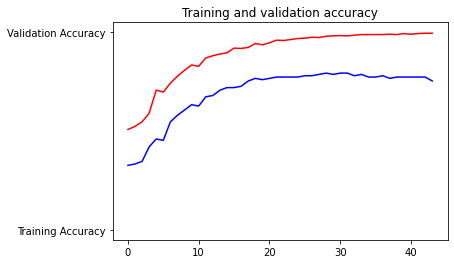

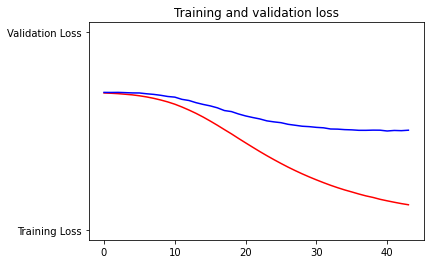

<Figure size 432x288 with 0 Axes>

In [30]:
#Plot training and validation accuracies
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
plt.title('Training and validation accuracy')
plt.figure()
plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and validation loss')
plt.figure()

In [31]:
#Verify Model/Evaluation Metric
score = model.evaluate(testing_padded, testing_labels_final, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.504411518573761 / Test accuracy: 0.753333330154419


In [32]:
#Making predictions
predictions = model.predict(testing_padded)

5/5 [==============================] - 0s 5ms/step


In [33]:
#Making predictions cont.
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    print("Predicted label: ", 'sentiment'[1][prediction])

In [60]:
#Testing the model
i = 4

print("Predicted review text:", df['review'][i], "\n")
print("Predicted: ", "Negative" if predictions[i][0] >= 0.5 else "Positive" , "review")
print("Actual: ", "Negative" if df['sentimentt'][i][1] == 0 else "Positive" , "review")

Predicted review text: The best scene in the movie was when Gerardo is trying to find a song that keeps running through his head   

Predicted:  Positive review
Actual:  Positive review


In [35]:
#Saving the model
model.save('SentimentalAnalysis.h5')